Question 1. For the beam shown in figure 1, determine the following. E = 210 GPa, I = 60 x
10-6 m-4, and P = 20 kN, L1=L2= 2m.
1. Global stiffness matrix for the structure.
2. Vertical displacement at node 2.
3. Rotations at nodes 2 and 3.
4. Reactions at nodes 1 and 3.
5. Shear force and bending moment in each element.
6. SFD for each element.
7. BMD for each element.

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

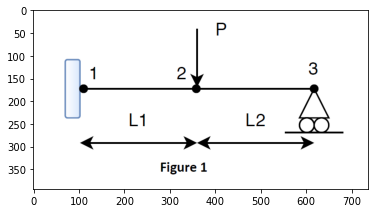

In [2]:
import matplotlib.image as mpimg
img=mpimg.imread('Q1.png')
imgplot = plt.imshow(img)


In [3]:

E=float(input("Young's Modulus in KN/M^2"))
I=float(input("Moment Of Inertia of Section in M^4"))
L1=float(input("Length of Element 1 in M"))
L2=float(input("Length of Element 2 in M"))
Pload=float(input("Enter Magnitude of point load in KN"))

def BeamElementStiffness(E,I,L):
    k = E*I/(L**3)*np.array([[12,6*L,-12,6*L],[6*L,4*L*L,-6*L,2*L*L],[-12,-6*L,12,-6*L],[6*L,2*L*L,-6*L,4*L*L]])
    return k

k1=BeamElementStiffness(E,I,L1)
k2=BeamElementStiffness(E,I,L2)

In [4]:
K = np.zeros((6,6))

def BeamAssemble(K,k,i,j):
    K[2*i-2][2*i-2]+=k[0][0]
    K[2*i-2][2*i-1]+=k[0][1]
    K[2*i-2][2*j-2]+=k[0][2]
    K[2*i-2][2*j-1]+=k[0][3]
    K[2*i-1][2*i-2]+=k[1][0]
    K[2*i-1][2*i-1]+=k[1][1]
    K[2*i-1][2*j-2]+=k[1][2]
    K[2*i-1][2*j-1]+=k[1][3]
    K[2*j-2][2*i-2]+=k[2][0]
    K[2*j-2][2*i-1]+=k[2][1]
    K[2*j-2][2*j-2]+=k[2][2]
    K[2*j-2][2*j-1]+=k[2][3]
    K[2*j-1][2*i-2]+=k[3][0]
    K[2*j-1][2*i-1]+=k[3][1]
    K[2*j-1][2*j-2]+=k[3][2]
    K[2*j-1][2*j-1]+=k[3][3]
    return K

K= BeamAssemble(K,k1,1,2)
K= BeamAssemble(K,k2,2,3)
print(f"Global Stifness Matrix = \n{K}")

Global Stifness Matrix = 
[[ 18900.  18900. -18900.  18900.      0.      0.]
 [ 18900.  25200. -18900.  12600.      0.      0.]
 [-18900. -18900.  37800.      0. -18900.  18900.]
 [ 18900.  12600.      0.  50400. -18900.  12600.]
 [     0.      0. -18900. -18900.  18900. -18900.]
 [     0.      0.  18900.  12600. -18900.  25200.]]


In [5]:

b= np.delete(K,4,0)
b= np.delete(b,4,1)
b= np.delete(b,1,0)
b= np.delete(b,1,1)
b= np.delete(b,0,0)
b= np.delete(b,0,1)
force= np.array([[0],[0],[-Pload],[0],[0],[0]])
f= np.delete(force,0,0)
f= np.delete(f,0,0)
f= np.delete(f,2,0)
u = np.linalg.inv(b).dot(f)
U=np.zeros((6,1))
U[2]=u[0]
U[3]=u[1]
U[5]=u[2]
print(f"Vertical Displacement at Node 2 : {U[2]} meter")
print(f"Rotation at Node 2 : {U[3]} rad")
print(f"Rotation at Node 3 : {U[5]} rad")


Vertical Displacement at Node 2 : [-0.00092593] meter
Rotation at Node 2 : [-0.00019841] rad
Rotation at Node 3 : [0.00079365] rad


In [6]:
F=K.dot(U)
print(f"Reaction at Node 1 : {F[0]} KN/M^2")
print(f"Moment at Node 1 : {F[1]} KN-M")
print(f"Reaction at Node 3 : {F[4]} KN/M^2")

Reaction at Node 1 : [13.75] KN/M^2
Moment at Node 1 : [15.] KN-M
Reaction at Node 3 : [6.25] KN/M^2


In [7]:
def BeamElementForces(k,u):
    return k.dot(u)
u1 = [U[0],U[1],U[2],U[3]]
u2 = [U[2],U[3],U[4],U[5]]
f1=BeamElementForces(k1,u1)
f2=BeamElementForces(k2,u2)
print(f"Shear Force in First Element : {f1[0]} KN")
print(f"Moment at node 1 of First Element : {f1[1]} KN-M ")
print(f"Moment at node 2 of First Element : {f1[3]} KN-M ")
print(f"Shear Force in second Element : {f2[0]} KN")
print(f"Moment at node 2 of second Element : {f2[1]} KN-M ")
print(f"Moment at node 3 of second Element : {f2[3]} KN-M ")


Shear Force in First Element : [13.75] KN
Moment at node 1 of First Element : [15.] KN-M 
Moment at node 2 of First Element : [12.5] KN-M 
Shear Force in second Element : [-6.25] KN
Moment at node 2 of second Element : [-12.5] KN-M 
Moment at node 3 of second Element : [0.] KN-M 


Shear Force Diagram for element 1 :


C:\Users\kprat\anaconda3\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


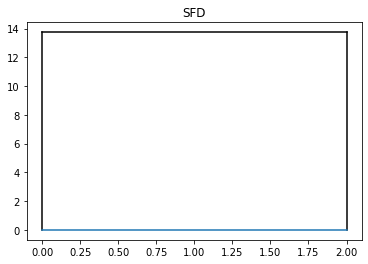

Shear Force Diagram for element 2 :


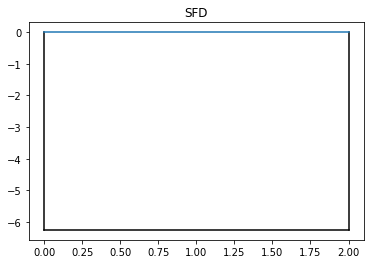

In [8]:
def BeamElementShearForceDiagram(f,L):
    x1,x2=0,L
    y1,y2=f[0],-f[2]
    plt.plot([x1,x2],[y1,y2],'black')
    plt.plot([x1,x1],[x1,y1],'black')
    plt.plot([x2,x2],[x1,y2],'black')
    plt.plot([x1,x2],[x1,x1])
    plt.title('SFD')
    plt.show()
print(f'Shear Force Diagram for element 1 :')
BeamElementShearForceDiagram(f1,L1)
print(f'Shear Force Diagram for element 2 :')
BeamElementShearForceDiagram(f2,L2)


BMD for element 1


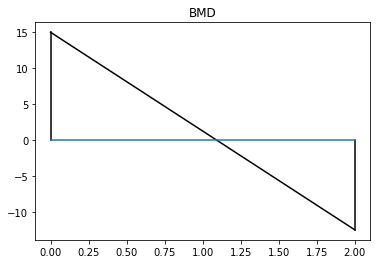

BMD for element 2


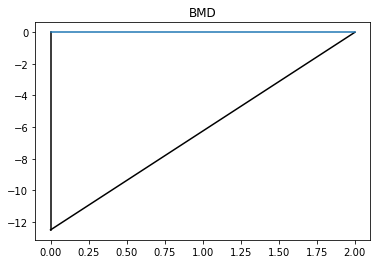

In [9]:
def BeamElementBMD(f,L):
    x1,x2=0,L
    y1,y2=f[1],-f[3]
    plt.plot([x1,x2],[y1,y2],'black')
    plt.plot([x1,x1],[x1,y1],'black')
    plt.plot([x2,x2],[x1,y2],'black')
    plt.plot([x1,x2],[x1,x1])
    plt.title('BMD')
    plt.show()
print("BMD for element 1")
BeamElementBMD(f1,L1)
print("BMD for element 2")
BeamElementBMD(f2,L2)

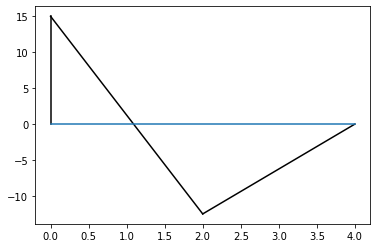

In [10]:
def BMD(f_1,f_2,L_1,L_2):
    x1,x2,x3=0,L_1,L_1+L_2
    y1,y2,y3=f_1[1],-f_1[3],-f_2[3]
    plt.plot([x1,x2],[y1,y2],'black')
    plt.plot([x2,x3],[y2,y3],'black')
    plt.plot([x1,x1],[x1,y1],'black')
    plt.plot([x1,x3],[x1,x1])
    
BMD(f1,f2,L1,L2)

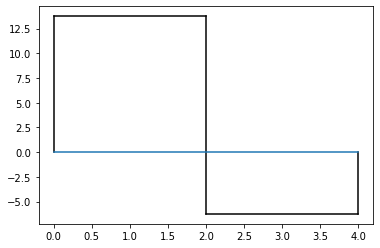

In [11]:
def SFD(f_1,f_2,L_1,L_2):
    x1,x2,x3=0,L_1,L_1+L_2
    y1,y2,y3,y4=f_1[0],-f_1[2],f_2[0],-f_2[2]
    plt.plot([x1,x2],[y1,y2],'k')
    plt.plot([x2,x3],[y3,y4],'k')
    plt.plot([x1,x1],[x1,y1],'k')
    plt.plot([x2,x2],[y2,y3],'k')
    plt.plot([x3,x3],[y3,x1],'k')
    plt.plot([x1,x3],[x1,x1])

SFD(f1,f2,L1,L2)